# A Kaggle competition

 https://www.kaggle.com/c/nlp-getting-started/overview

## Setup

In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import plotly.express as px

from IPython.display import clear_output

In [88]:
train_df = pd.read_csv('./data/train.csv')

## Exploring the dataset

In [12]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### columns:

* id - a unique identifier for each tweet
* keyword - a particular keyword from the tweet (may be blank)
* location - the location the tweet was sent from (may be blank)
* text - the text of the tweet
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


There are **7613** tweets. There are some Null values in 'keyword' and 'locations' columns. 

In [89]:
# two approches to count the number of instances in each class
# train_df.groupby('target').text.count()
#fig = px.pie(data_frame=train_df, names='target', title='Distribution of Real vs Not-Real Disaster Tweets')
#fig.show()
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

**4342** of tweets are not about real disasters and **3271** are about real disasters.

In [19]:
def display_pie_target(df, title=None):
    """Display a pie chart based on target column.
    Input: 
        df: a datafram with a target column (0 and 1 values)
        title: str
    Output:
        Display a pie chart
    """
    
    # sizes for each slice
    sizes = np.array(df.target.value_counts())

    # labels for classes
    labels = 'Non-Disaster', 'Disaster'

    # declare the pie chart
    plt.pie(sizes, labels = labels, autopct='%1.1f%%')

    # display the title
    plt.title(title)

    # display the chart
    plt.show()
    

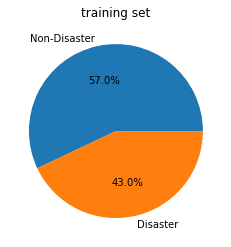

In [20]:
display_pie_target(train_df, 'training set')

221 is the number of unique values in keyword


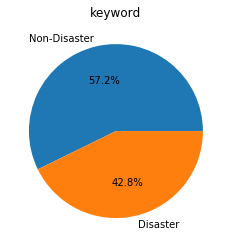

3341 is the number of unique values in location


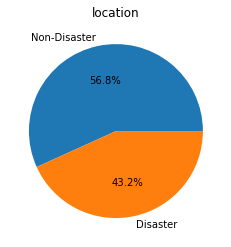

7503 is the number of unique values in text


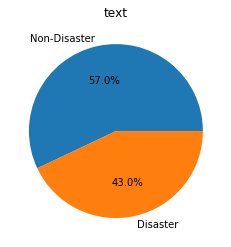

In [21]:
for col in train_df.columns[1:-1]:
    
    # dataset of rows that column is not null 
    df_notnull = train_df[train_df[col].notnull()] 

    print(len(pd.unique(df_notnull[col])), 'is the number of unique values in' , col)

    display_pie_target(df_notnull, col)

In [48]:
train_df.drop_duplicates(subset=['text'])['target'].value_counts()

0    4305
1    3198
Name: target, dtype: int64

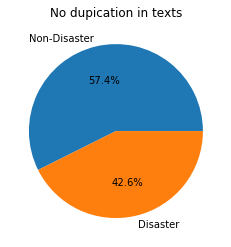

In [44]:
display_pie_target(train_df.drop_duplicates(subset=['text']),'No dupication in texts')

In [56]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 100)
clear_output()

In [90]:
x = len(train_df)
print('Dataset had {} rows.'.format(x))
train_df.drop_duplicates(subset=['keyword', 'location', 'text', 'target'], keep='first', inplace=True, ignore_index=True)
print('{} duplicated rows are removed (only the first one is kept).'.format(x - len(train_df)))

Dataset had 7613 rows.
52 duplicated rows are removed (only the first one is kept).


In [91]:
# removing all duplicates with different target values. These are considered as noise for training.
x = len(train_df)
print('Dataset had {} rows.'.format(x))
train_df.drop_duplicates(subset=['keyword', 'location', 'text'], keep=False, inplace=True, ignore_index=True)
print('{} duplicated rows are removed.'.format(x - len(train_df)))

Dataset had 7561 rows.
18 duplicated rows are removed.


In [96]:
# duplicates text
train_df[train_df.duplicated(subset=['text'], keep=False)].sort_values(by='text')

,id,keyword,location,text,target
4251,6094,hellfire,"Jubail IC, Saudi Arabia.",#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4259,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,0
4267,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect,1
1696,2459,collided,"Peterborough, On",#Newswatch: 2 vehicles collided at Lock and Lansdowne Sts in #Ptbo. Emerg crews on their way,1
1717,2488,collided,"Peterborough, Ont.",#Newswatch: 2 vehicles collided at Lock and Lansdowne Sts in #Ptbo. Emerg crews on their way,1
3758,5382,fire%20truck,"Orange County, Calif.",#SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.,1
3763,5387,fire%20truck,"Orange County, CA",#SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.,1
1234,1790,buildings%20on%20fire,Scotland,#TweetLikeItsSeptember11th2001 Those two buildings are on fire,1
1243,1807,buildings%20on%20fire,UK,#TweetLikeItsSeptember11th2001 Those two buildings are on fire,1
4207,6031,hazardous,"New Delhi, Delhi",#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,0


In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7543 entries, 0 to 7542
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7543 non-null   int64 
 1   keyword   7482 non-null   object
 2   location  5057 non-null   object
 3   text      7543 non-null   object
 4   target    7543 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 294.8+ KB


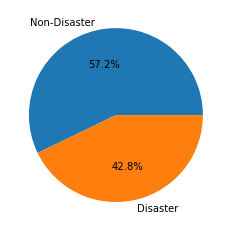

In [97]:
display_pie_target(train_df)

### Looking at raw values of text

In [98]:
# display disaster rows when no column is null
train_df[(train_df.target==1) & train_df.keyword.notna() & train_df.location.notna()][:7]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA,1
46,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfires ablaze in California alone http://t.co/vl5TBR3wbr,1
49,73,ablaze,"Sheffield Township, Ohio",Deputies: Man shot before Brighton home set ablaze http://t.co/gWNRhMSO8k,1
50,74,ablaze,India,Man wife get six years jail for setting ablaze niece\nhttp://t.co/eV1ahOUCZA,1
52,77,ablaze,Anaheim,Police: Arsonist Deliberately Set Black Church In North CarolinaåÊAblaze http://t.co/pcXarbH9An,1


In [99]:
# print non-disaster rows when no column is null
train_df[(train_df.target==0) & train_df.keyword.notna() & train_df.location.notna()][:7]

,id,keyword,location,text,target
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.,0
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0
42,62,ablaze,milky way,Had an awesome time visiting the CFC head office the ancop site and ablaze. Thanks to Tita Vida for taking care of us ??,0


The same keyboard (such as "ablaze") can be in both target classes.

## Preprocessing

In [11]:
from utils import process_tweet, build_freqs

In [13]:
freqs = build_freqs(train_df.text, train_df.target)

In [14]:
# print length of the dictionary
print(f'len(freqs) = {len(freqs)}')

print(freqs)

len(freqs) = 15323
{('deed', 1): 1, ('reason', 1): 8, ('earthquak', 1): 39, ('may', 1): 50, ('allah', 1): 6, ('forgiv', 1): 1, ('us', 1): 44, ('forest', 1): 48, ('fire', 1): 268, ('near', 1): 49, ('la', 1): 21, ('rong', 1): 1, ('sask', 1): 1, ('canada', 1): 5, ('resid', 1): 9, ('ask', 1): 5, ('shelter', 1): 7, ('place', 1): 15, ('notifi', 1): 1, ('offic', 1): 41, ('evacu', 1): 101, ('order', 1): 25, ('expect', 1): 22, ('13,000', 1): 1, ('peopl', 1): 106, ('receiv', 1): 4, ('wildfir', 1): 78, ('california', 1): 110, ('got', 1): 29, ('sent', 1): 3, ('photo', 1): 28, ('rubi', 1): 1, ('alaska', 1): 5, ('smoke', 1): 14, ('pour', 1): 2, ('school', 1): 32, ('rockyfir', 1): 4, ('updat', 1): 36, ('hwi', 1): 11, ('20', 1): 13, ('close', 1): 30, ('direct', 1): 6, ('due', 1): 24, ('lake', 1): 9, ('counti', 1): 31, ('cafir', 1): 1, ('flood', 1): 118, ('disast', 1): 119, ('heavi', 1): 18, ('rain', 1): 39, ('caus', 1): 62, ('flash', 1): 17, ('street', 1): 24, ('manit', 1): 1, ('colorado', 1): 10, ('s

In [36]:
df_notnull = train_df[train_df.keyword.notnull()]

In [70]:
print(pd.unique(df_notnull.keyword))

['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'drought' 

In [47]:
import re

In [71]:
df_notnull.keyword = df_notnull.keyword.apply(lambda x: re.sub(r'\d', ' ', x))
print(pd.unique(df_notnull.keyword))

['ablaze' 'accident' 'aftershock' 'airplane%  accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%  up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%  up' 'body%  bag' 'body%  bagging'
 'body%  bags' 'bomb' 'bombed' 'bombing' 'bridge%  collapse'
 'buildings%  burning' 'buildings%  on%  fire' 'burned' 'burning'
 'burning%  buildings' 'bush%  fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%  emergency' 'cliff%  fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'devastation' 'disaster' 'displaced' 'drought' 

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [72]:
freqs_keywords = build_freqs(df_notnull.keyword, df_notnull.target)

In [76]:
# print length of the dictionary
print(len(freqs_keywords))

print(sorted(freqs_keywords))

343
[('ablaz', 0), ('ablaz', 1), ('accid', 0), ('accid', 1), ('aftershock', 0), ('airplan', 0), ('airplan', 1), ('ambul', 0), ('ambul', 1), ('annihil', 0), ('annihil', 1), ('apocalyps', 0), ('apocalyps', 1), ('armageddon', 0), ('armageddon', 1), ('armi', 0), ('armi', 1), ('arson', 0), ('arson', 1), ('arsonist', 0), ('arsonist', 1), ('attack', 0), ('attack', 1), ('avalanch', 0), ('avalanch', 1), ('bag', 0), ('bag', 1), ('bang', 0), ('bang', 1), ('battl', 0), ('battl', 1), ('bioterror', 0), ('bioterror', 1), ('blaze', 0), ('blaze', 1), ('bleed', 0), ('bleed', 1), ('blew', 0), ('blew', 1), ('blight', 0), ('blight', 1), ('blizzard', 0), ('blizzard', 1), ('blood', 0), ('blood', 1), ('bloodi', 0), ('bloodi', 1), ('blown', 0), ('blown', 1), ('bodi', 0), ('bodi', 1), ('bomb', 0), ('bomb', 1), ('bomber', 0), ('bomber', 1), ('bridg', 0), ('bridg', 1), ('build', 0), ('build', 1), ('burn', 0), ('burn', 1), ('bush', 0), ('bush', 1), ('casualti', 0), ('casualti', 1), ('catastroph', 0), ('catastroph'